# Engenharia do Conhecimento 2023/2024

## TP05: A Brief introduction to Naive Bayes 

*A Machine Learning Tutorial by Andre Falcao (DI/FCUL 2020-2022)*
*revised by Catia Pesquita (DI/FCUL 2022-2023) and Sofia Teixeira (DI/FCUL 2023-2024)*

### Summary

1. Introduction to Naive-Bayes using Categorical Naive Bayes
2. Naive Bayes in Scikit-learn
3. Gaussian Naive-Bayes


## 1. Introduction to Naïve Bayes

Let's start with a very simple example. We have a dataset of 14 individuals who underwent rapid tests for Covid, from different brands (Teste_A and Teste_B columns). These individuals were then evaluated with an effective PCR test that said whether or not they were carriers of the SARS-Cov-2 Virus (Covid column).

The results are in the covid.txt file.

In [60]:
import numpy as np
import pandas as pd
df_covid=pd.read_csv("covid.txt", sep="\t")

df_covid

,Teste_A,Teste_B,Covid
0,P,P,P
1,P,P,P
2,P,N,N
3,N,N,N
4,N,N,N
5,N,P,N
6,N,P,P
7,N,P,N
8,P,P,P
9,N,N,N


### 1.1. Basic concepts and Bayes' Theorem

Let's try to answer the following questions:
1. What is the probability of an individual being infected with Covid?
2. What is the probability that an individual who tested positive in Test B is actually positive for Covid
3. What is the probability that an individual who has Covid will have a positive B test? 

#### 1.1.1 Estimation of Covid
The answer to the first question can be estimated assuming the sample is representative of the population

$P(Covid_+)=\frac{N_{pos}}{N}$

The probability of a given class is also called *prior* because it has to do with our belief *a priori* of the proportion of individuals of each class in the population, not knowing anything else about each individual.

In [61]:
N=df_covid.shape[0] #number of instances or individuals

N_covid=df_covid[ df_covid.Covid=="P"].index.shape[0] #number of positive individuals
N_ncovid=df_covid[df_covid.Covid=="N"].index.shape[0] #number of negative individuals

P_covid=N_covid/N
P_ncovid=N_ncovid/N

print("Probability of an individual having Covid is: %7.3f" %P_covid)
print("Probability of an individual not having Covid is: %7.3f" %P_ncovid)


Probability of an individual having Covid is:   0.357
Probability of an individual not having Covid is:   0.643



#### 1.1.2. Identify the relationship between having a test result and the diagnosis

What is the probability that an individual who tested positive on test A has in fact Covid?

What we are defining is the probability of an individual being positive if the test A is positive, that is, among all individuals who had a positive A test, what fraction were in fact positive:

$P(Covid_+ | A_+)=\frac{P(Covid_+, A_+)}{P(A_+)}$

$P(Covid_- | A_+)=\frac{P(Covid_-, A_+)}{P(A_+)}$

What we are actually saying here is **what is the updated probability** that the individual is Positive (with COVID) **if we have the evidence** that test A was positive for such individual.

In [62]:
#number of positive individuals with a positive test A
N_covid_Ap =df_covid[(df_covid.Covid=="P") & (df_covid.Teste_A=="P")].index.shape[0] 

#number of negative individuals with a positive test A
N_ncovid_Ap=df_covid[(df_covid.Covid=="N") & (df_covid.Teste_A=="P")].index.shape[0]

#number of individuals with a positive test A
N_Ap= df_covid[(df_covid.Teste_A=="P")].index.shape[0]

print("The probability that someone who had the A test Positive           HAS Covid is %7.3f" % (N_covid_Ap/N_Ap))
print("The probability that someone who had the A test Positive DOES NOT HAVE Covid is %7.3f" % (N_ncovid_Ap/N_Ap))


The probability that someone who had the A test Positive           HAS Covid is   0.800
The probability that someone who had the A test Positive DOES NOT HAVE Covid is   0.200


For Test B the procedure is the same, and even then if it seems that test B is "useless", notice that our prior conviction gets updated from 0.357 to 0.500, which is actually substantial.

In [63]:
N_covid_Bp =df_covid[(df_covid.Covid=="P") & (df_covid.Teste_B=="P")].index.shape[0]
N_ncovid_Bp=df_covid[(df_covid.Covid=="N") & (df_covid.Teste_B=="P")].index.shape[0]
N_Bp= df_covid[(df_covid.Teste_B=="P")].index.shape[0]


print("The probability that someone who had the B test Positive           HAS Covid is %7.3f" % (N_covid_Bp/N_Bp))
print("The probability that someone who had the B test Positive DOES NOT HAVE Covid is %7.3f" % (N_ncovid_Bp/N_Bp))


The probability that someone who had the B test Positive           HAS Covid is   0.500
The probability that someone who had the B test Positive DOES NOT HAVE Covid is   0.500


#### 1.1.3. Identify the relationship between a covid diagnosis and a test result


In this case we want to know what is the probability that an individual who has Covid will test positive on test A? What we are representing here is, within individuals with positive Covid, which fraction was positive in test A

$P(A_+|Covid_+ )=\frac{P(Covid_+, A_+)}{P(Covid_+)}$

$P(A_-|Covid_+ )=\frac{P(Covid_+, A_-)}{P(Covid_+)}$


In [64]:
#number of positive individuals with a positive test A
N_Ap_covid=df_covid[(df_covid.Covid=="P") & (df_covid.Teste_A=="P")].index.shape[0]

#number of positive individuals with a negative test A
N_An_covid=df_covid[(df_covid.Covid=="P") & (df_covid.Teste_A=="N")].index.shape[0]

L_Ap_covid=N_Ap_covid/N_covid #probability of testing positive on test A if you have covid
L_An_covid=N_An_covid/N_covid #probability of testing negative on test A if you have covid

print("The probability that someone who HAS Covid will have a Positive test A is : %7.3f" %L_Ap_covid)
print("The probability that someone who HAS Covid will have a Negative test A is : %7.3f" %L_An_covid)


The probability that someone who HAS Covid will have a Positive test A is :   0.800
The probability that someone who HAS Covid will have a Negative test A is :   0.200


Similarly for test B, we may have

In [65]:
N_Bp_covid=df_covid[(df_covid.Covid=="P") & (df_covid.Teste_B=="P")].index.shape[0]
N_Bn_covid=df_covid[(df_covid.Covid=="P") & (df_covid.Teste_B=="N")].index.shape[0]

L_Bp_covid = N_Bp_covid/N_covid
L_Bn_covid = N_Bn_covid/N_covid

print("The probability that someone who HAS Covid will test B POSITIVE is : %7.3f" % L_Bp_covid)
print("The probability that someone who HAS Covid will test B NEGATIVE is : %7.3f" % L_Bn_covid)


The probability that someone who HAS Covid will test B POSITIVE is :   0.800
The probability that someone who HAS Covid will test B NEGATIVE is :   0.200


#### 1.1.4. Bayes Theorem

The values above are the Likelihoods and are related to the Posterior by the Bayes theorem. For the case of the positive test A and positive Covid, we have the likelihood:

$P(A_+|Covid_+ )=\dfrac{P(Covid_+, A_+)}{P(Covid_+)}$

and the posterior:

$P(Covid_+ | A_+)=\dfrac{P(Covid_+, A_+)}{P(A_+)}$


Therefore, it is not difficult to relate the two terms. We are able to calculate the posterior multiplying the likelihood and the priors of the classes, and dividing by the marginal of the atribute (A test in this case):

$P(Covid_+ | A_+)=\dfrac{P( A_+ | Covid_+ ).P(Covid_+)}{P(A_+)}$

This last expression is one of the most common representations of Bayes' Theorem 

In [66]:
#priors of each class
P_Ap= N_Ap/N #probability of having a positive test A
P_Bp= N_Bp/N #probability of having a positive test B

#Posteriors computed according to Bayes
P_Covid_Ap = (L_Ap_covid * P_covid)/P_Ap #probability of having COVID with a positive on Test A
P_Covid_Bp = (L_Bp_covid * P_covid)/P_Bp  #probability of having COVID with a positive on Test B

print("The calculated Posterior of having Covid having a Positive test A is:  %7.3f" %P_Covid_Ap)
print("The calculated Posterior of having Covid having a Positive test B is:  %7.3f" %P_Covid_Bp)

The calculated Posterior of having Covid having a Positive test A is:    0.800
The calculated Posterior of having Covid having a Positive test B is:    0.500


### 1.2. Naive Bayes

The central idea in Naive Bayes is the simplifying approach in which **we assume that the independent variables (features) are independent if we know the class**.  Therefore we can multiply the likelihoods of the variables involved by the prior of the class to obtain a value proportional (the denominator being constant needs not to be considered) to the *posteriori* and choose among the obtained values, the one with the highest value (Maximum a posteriori - MAP)

So for the above problem, the probability of someone having Covid, given they tested Positive in both tests is:

$P(Covid_+ | A_+, B_+) \propto P(A_+ |Covid_+ ).P(B_+ |Covid_+ ).P(Covid_+)$

and the probability of someone not having Covid, given they tested Positive in both tests is:

$P(Covid_- | A_+, B_+) \propto P(A_+ |Covid_- ).P(B_+ |Covid_- ).P(Covid_-)$

_Note: $\propto$ reads "proportional to"_

In [67]:
#we will first need to calculate the likelihood associated with not having covid given
#that each of the two tests are positive 

#number of individuals who do not have covid and test positive on test A
N_Ap_ncovid=df_covid[(df_covid.Covid=="N") & (df_covid.Teste_A=="P")].index.shape[0]  

#number of individuals who do not have covid and test positive on test B
N_Bp_ncovid=df_covid[(df_covid.Covid=="N") & (df_covid.Teste_B=="P")].index.shape[0]

L_Ap_ncovid=N_Ap_ncovid/N_ncovid #probability(likelihood) of having a positive on test A and not having covid
L_Bp_ncovid=N_Bp_ncovid/N_ncovid #probability(likelihood) of having a positive on test B and not having covid

P_pp_covid =  L_Ap_covid  *  L_Bp_covid   * P_covid #probability of testing positive on both tests and having covid
P_pp_ncovid = L_Ap_ncovid *  L_Bp_ncovid  * P_ncovid #probability of testing positive on both tests and not having covid

print("Probability that someone with both tests positive           HAS Covid is (proportional to): %7.3f" % P_pp_covid)
print("Probability that someone with both tests positive DOES NOT HAVE Covid is (proportional to): %7.3f" % P_pp_ncovid)


Probability that someone with both tests positive           HAS Covid is (proportional to):   0.229
Probability that someone with both tests positive DOES NOT HAVE Covid is (proportional to):   0.032


Therefore the Naïve Bayes classifier will choose the class with the highest probability (Covid Positive) and we may associate a confidence corresponding to the probability:

In [68]:
print("the individual is Covid Positive, with a confidence of: %.1f%%" %(P_pp_covid/(P_pp_covid+P_pp_ncovid)*100))

the individual is Covid Positive, with a confidence of: 87.8%


#### Exercise 1

Calculate:
1. How should someone with both tests negative be classified? You may add the confidence.
2. What if someone tests A positive and B negative? 

In [69]:
#HINT: to solve the exercise, we need to calculate the likelihood of the tests being negative and not having covid 

#individuals with a negative test A and not having covid
#P(-A ∩ -Covid)
N_An_ncovid = df_covid[(df_covid.Covid=="N") & (df_covid.Teste_A=="N")].index.shape[0];

#individuals with a negative test B and not having covid
#P(-B ∩ -Covid)
N_Bn_ncovid = df_covid[(df_covid.Covid=="N") & (df_covid.Teste_B=="N")].index.shape[0];

#P(-A | -Covid)
L_An_ncovid = N_An_ncovid/N_ncovid; #probability of having a negative on test A and not having covid

#P(-B | -Covid)
L_Bn_ncovid = N_Bn_ncovid/N_ncovid; #probability of having a negative on test B and not having covid


In [70]:
#solução exercício 1.1

#P(-Covid | -A ∩ -B) ∝ P(-A | -Covid) * P(-B | -Covid) * P(-Covid)
P_nn_ncovid = L_An_ncovid * L_Bn_ncovid * P_ncovid #probability of testing negative on both tests and not having covid

#P(Covid | -A ∩ -B) ∝ P(-A | Covid) * P(-B | Covid) * P(Covid)
P_nn_covid = L_An_covid * L_Bn_covid * P_covid #probability of testing negative on both tests and having covid


print("Probability that someone with both tests negative    DOES NOT HAS Covid is (proportional to): %7.3f" % P_nn_ncovid);
print("Probability that someone with both tests negative             HAS Covid is (proportional to): %7.3f" % P_nn_covid);

print("the individual is Covid Negative, with a confidence of: %.1f%%" % (P_nn_ncovid/(P_nn_covid+P_nn_ncovid)*100));

Probability that someone with both tests negative    DOES NOT HAS Covid is (proportional to):   0.317
Probability that someone with both tests negative             HAS Covid is (proportional to):   0.014
the individual is Covid Negative, with a confidence of: 95.7%


In [71]:
#solução exercício 1.2

#P(Covid | -A ∩ B) ∝ P(A | Covid) * P(-B | Covid) * P(Covid)
P_pn_covid = L_Ap_covid * L_Bn_covid * P_covid #probability of testing negative on test A and positive on test B and not having covid

#P(-Covid | -A ∩ B) ∝ P(A | -Covid) * P(-B | -Covid) * P(-Covid)
P_pn_ncovid = L_Ap_ncovid * L_Bn_covid * P_ncovid #probability of testing negative on test A and positive on test B and having covid

print("Probability that someone with test A negative and test B positive DOES NOT HAVE Covid is (proportional to): %7.3f" % P_pn_ncovid);
print("Probability that someone with test A negative and test B positive          HAS Covid is (proportional to): %7.3f" % P_pn_covid);

print("the individual is Covid Positive, with a confidence of: %.1f%%" % (P_pn_ncovid/(P_pn_covid+P_pn_ncovid)*100));

Probability that someone with test A negative and test B positive DOES NOT HAVE Covid is (proportional to):   0.014
Probability that someone with test A negative and test B positive          HAS Covid is (proportional to):   0.057
the individual is Covid Positive, with a confidence of: 20.0%


## 2. Naive Bayes in scikit-learn

###  The Covid example


#### Step 1 - get the training and testing data

Let's process the data, by getting it out of the existing pandas dataframe. It is essential for most models that the data is numeric, so we will transform our data matrix into two columns with 0, and 1. Note that we use the pandas `get_dummies()` function, with the argument `drop_first=True` to ensure that for each feature we have only one column and when the value is positive it is 1, otherwise it is 0.

In [72]:
X_df0 = df_covid.drop(columns=["Covid"])
X_df= pd.get_dummies(X_df0, drop_first=True)
X_df.columns=X_df0.columns

y_train = df_covid.values[:, 2]
X_train = X_df.values[:,[0,1]]
print("X_train:", X_train) 
print("y_train:", y_train)

X_train: [[ True  True]
 [ True  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [False  True]
 [False  True]]
y_train: ['P' 'P' 'N' 'N' 'N' 'N' 'P' 'N' 'P' 'N' 'P' 'N' 'N' 'N']


The testing set will be only our four possible cases (all possible combinations of tests A and B results)

In [73]:
X_test=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X_test

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

#### Step 2 - Set up the classifier

Given that in this case we are dealing with categorical values **only** (each feature has only two possible values), we use [CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html), which treats each feature value as categorical. 

We will now build our classifier. Note that the CategoricalNB uses an argument `alpha` that corresponds to the `Laplace's Alpha smoothing factor`. This argument is important to account to situations in which a given likelihood may be zero. 

With CategoricalNB we can obtain the classification given by the most likely class using the `.predict(X)` method. However, we can inspect directly the probabilities for each class by using the `.predict_proba(X)` method. The order of the columns is the alphabetical order of the classes, so the 1st column corresponds to class `N` and the 2nd to class `P` 

In [74]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
mdl=CategoricalNB(alpha=0.001)

#### Step 3 - Fit the model

This is the easiest part



In [75]:
mdl.fit(X_train,y_train);

#### Step 4 - Make predictions with the testing data


In [76]:
probas=mdl.predict_proba(X_test)
for i, x in enumerate(probas):
    print("Case: ", X_test[i])
    for j, c in enumerate(["N", "P"]):
        print("\tP(Y = %s | X=%s )= %7.3f"% (c, X_test[i], x[j]))


Case:  [0 0]
	P(Y = N | X=[0 0] )=   0.957
	P(Y = P | X=[0 0] )=   0.043
Case:  [0 1]
	P(Y = N | X=[0 1] )=   0.816
	P(Y = P | X=[0 1] )=   0.184
Case:  [1 0]
	P(Y = N | X=[1 0] )=   0.410
	P(Y = P | X=[1 0] )=   0.590
Case:  [1 1]
	P(Y = N | X=[1 1] )=   0.122
	P(Y = P | X=[1 1] )=   0.878


Scikit-learn Naive Bayes has of course the `.predict(X)` method that makes the classification directly, without going through the probabilities

In [77]:
preds=mdl.predict(X_test)
for i, p in enumerate(preds):
    print("Case: ", X_test[i], "-->", p)
    

Case:  [0 0] --> N
Case:  [0 1] --> N
Case:  [1 0] --> P
Case:  [1 1] --> P


#### Exercise 2

Imagine we have a dataset with 4 variables, each with 3 possible values, and 3 classes. 
1. How many likelihoods do we have to calculate?
2. And how many priors?
3. Is it reasonable to expect that all likelihoods have strict positive values? Why?

In [78]:
### Write your answers here

#2.1 The number of likelihoods to calculate would be the number of variables times the number of possible values for each variable 
# times the number of classes. In this case, it would be 4 variables * 3 possible values * 3 classes = 36 likelihoods.

#2.2 The number of priors to calculate would be equal to the number of classes, as each class has a prior probability. In this case, it would be 3 priors.

#2.3 No, because in the model multiplies conditional probabilities to calculate likelyhoods, in practice, some likelihoods might be zero if a particular combination of variable value and class never occurs in the training data.
# so there is no garantee that all likelihoods are strict positive.

## 3. Gaussian Naive Bayes

### 3.1. The essence of Bayesian classification in 1-Dimension

Assuming a Gaussian distribution of the independent variable, in one dimension, it is very simple to make a Bayesian classifier. Given 2 classes A and B, the probability that instance i is in class A can be computed as the product of the likelihood and the priors

$P(i \in Class_A | x_i) \propto P(x_i |i \in Class_A).P(Class_A)$

$P(i \in Class_B | x_i) \propto P(x_i |i \in Class_B).P(Class_B)$

What makes a Bayesian classifier in this condition is the simple observation that the likelihoods are proportional to the probability distribution functions.

For instance, if we have 2 Gaussian distributions for class A and B, assuming identical priors, the optimal classification separation line is where both lines intersect.

So if we have a class A with mean = 2.0 and stddev =  0.5, and class B with mean = 3.5 and stddev = 1.5, we can compute their distributions.

In [79]:
from scipy.stats import norm

normA=norm(loc=2.0, scale=0.5)
normB=norm(loc=3.5, scale=1.5)

And actually plot them on a given interval

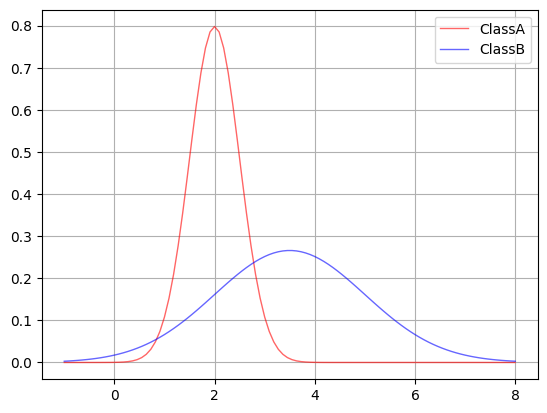

In [80]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 8, 100)
yA = normA.pdf(x)
yB = normB.pdf(x)

plt.plot(x, yA,'r-', lw=1, alpha=0.6, label='ClassA')
plt.plot(x, yB,'b-', lw=1, alpha=0.6, label='ClassB')
plt.legend()
plt.grid()
plt.show()

We can actually identify the regions that belong to each class _a priori_

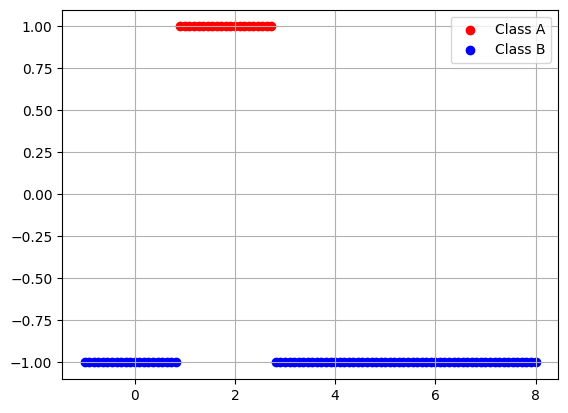

In [81]:
A_regions=x[yA-yB>0]
B_regions=x[yA-yB<=0]
plt.scatter(A_regions, np.ones(A_regions.size), c="r", label="Class A")
plt.scatter(B_regions, -np.ones(B_regions.size), c="b", label="Class B")
plt.legend()
plt.grid()
plt.show()

Lets visualise a 2 dimensional classification problem

In [82]:
import pandas as pd

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

df_train

,x1,x2,cl
0,0.4686,5.8533,A
1,2.0865,5.3786,A
2,3.5261,5.4588,A
3,2.0805,5.3412,A
4,3.9224,9.1333,A
...,...,...,...
495,-2.0556,4.4121,B
496,-1.9094,7.0318,B
497,0.1532,4.6287,A
498,-0.7840,6.4127,B


In [83]:
y_train=df_train["cl"]
y_train=np.array(y_train, dtype="U")
X_train=df_train.values[:,0:2]
X_train=X_train.astype(float)

y_test=df_test["cl"]
y_test=y_test.astype("U") #need to update the type
X_test=df_test.values[:,0:2]
X_test=X_test.astype(float)


And let's plot it

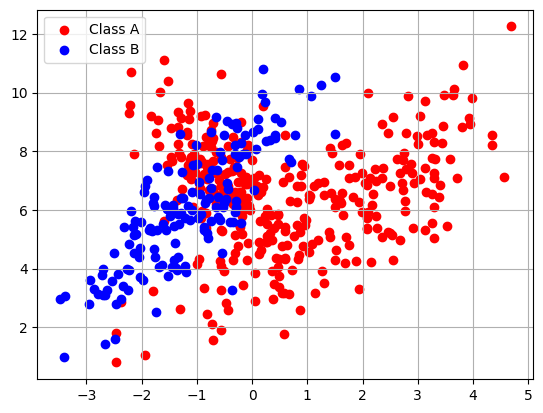

In [84]:
plt.scatter(X_train[y_train=="A",0], X_train[y_train=="A",1], label="Class A", c="red")
plt.scatter(X_train[y_train=="B",0], X_train[y_train=="B",1], label="Class B", c="blue")
plt.legend()
plt.grid()
plt.show()

Let's compute the global statistics

In [85]:
m1, m2 = np.mean(X_train, axis=0)
v1, v2 = np.var(X_train, axis=0)
s1, s2 = np.sqrt(np.array([v1, v2]))

Let's check just the difference in mean and stddev for the first variable (column = 0)

In [86]:
cA=X_train[y_train=="A", 0]
cB=X_train[y_train=="B", 0]

mA =np.mean(cA)
mB =np.mean(cB)
sA=np.sqrt(np.var(cA))
sB=np.sqrt(np.var(cB))
print( "For class A, the mean of x1 is %6.3f and the stdev is %6.3f" % (mA, sA))
print( "For class B, the mean of x1 is %6.3f and the stdev is %6.3f" % (mB, sB))

For class A, the mean of x1 is  0.620 and the stdev is  1.595
For class B, the mean of x1 is -1.129 and the stdev is  1.024


Following the above procedure we can similarly compute the normals and check them visually

Assuming that each class is equally likely we can plot the Gaussians of both classes.

We can see that that point around -0.06 is what separates the highest likelihood of a new random instance belonging to a given class

* It is class A if $x > -0.06 $
* It is class B if $x\leq -0.06 $


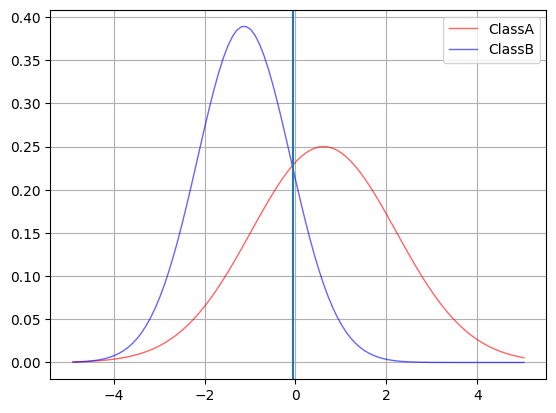

In [87]:
x = np.linspace(m1-3*s1, m1+3*s1, 100)
normA=norm(loc=mA, scale=sA)
normB=norm(loc=mB, scale=sB)
yA = normA.pdf(x)
yB = normB.pdf(x)

plt.plot(x, yA,'r-', lw=1, alpha=0.6, label='ClassA')
plt.plot(x, yB,'b-', lw=1, alpha=0.6, label='ClassB')
plt.axvline(-0.06)
plt.legend()
plt.grid()
plt.show()


This would be true if the priors of both classes were equally probable. Let's see if that's true, by calculating their priors.


In [88]:
nA=np.sum(y_train=="A")
nB=np.sum(y_train=="B")
priorA, priorB = nA/(nA+nB), nB/(nA+nB), 
priorA, priorB

(0.684, 0.316)

We can see that actually class A is much more representative than class B, so we can update our model accordingly.

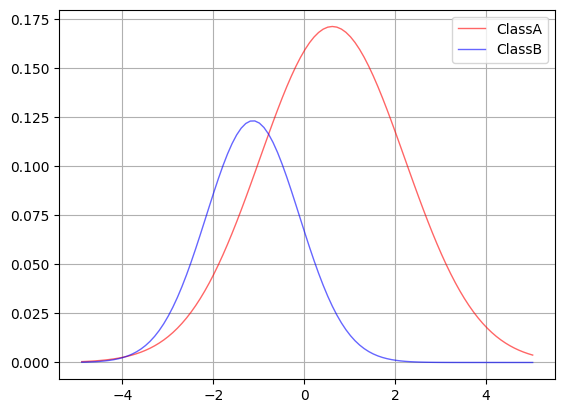

In [89]:
yA = normA.pdf(x)*priorA
yB = normB.pdf(x)*priorB

plt.plot(x, yA,'r-', lw=1, alpha=0.6, label='ClassA')
plt.plot(x, yB,'b-', lw=1, alpha=0.6, label='ClassB')
plt.legend()
plt.grid()
plt.show()

With this update, we can see that class A is much more dominant. In terms of regions for classification, we see that there are two different ranges of values for which classifications will go to Class A.

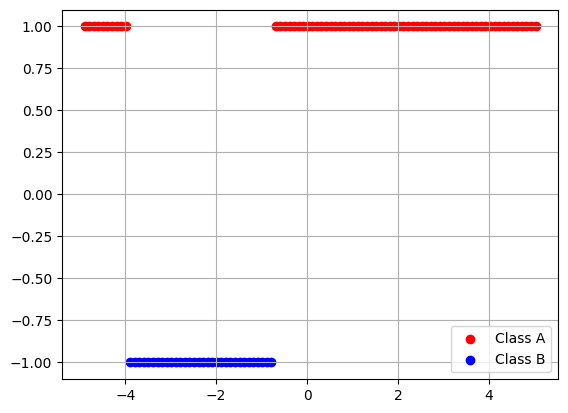

In [90]:
A_regions=x[yA-yB>0]
B_regions=x[yA-yB<=0]
plt.scatter(A_regions, np.ones(A_regions.size), c="r", label="Class A")
plt.scatter(B_regions, -np.ones(B_regions.size), c="b", label="Class B")
plt.legend()
plt.grid()
plt.show()

We can now use the test set to evaluate the model. We compute the respective likelihoods of both classes and multiply by the priors. The predicted class is just when the value of one class is larger than the other.

In [91]:
yA = normA.pdf(X_test[:,0])*priorA
yB = normB.pdf(X_test[:,0])*priorB
preds=np.array(["A", "B"])[np.array(yA<=yB, dtype=int)]


In [92]:
from sklearn.metrics import confusion_matrix, f1_score
print("The F1 score is:", f1_score(y_test, preds, average=None))
print(confusion_matrix(y_test, preds))

The F1 score is: [0.77419355 0.63157895]
[[96 42]
 [14 48]]


### 2.2 Combining multiple quantitative dimensions

The above describes a Gaussian Bayesian classifier. For Naive Bayes we need to do as we have done above for categorical data. We need to compute the priors and the likelyhoods for each variable and class

$P(i \in Class_A | x_i) \propto \prod_j{P(x_{ij} |i \in Class_A)}.P(Class_A)$

$P(i \in Class_B | x_i)  \propto \prod_j{P(x_{ij} |i \in Class_B)}.P(Class_B)$

Therefore we need some functions that, given any dataset, are able to:

* compute overal statistics for parametrization of the Gaussians and priors `get_class_stats()`
* compute the Gaussian functions given the stats for each class `get_gaussians()`
* Compute the priors given the priors `get_priors()`

In [93]:
#this function will compute the means and std deviations for all classes
def get_class_stats(X, y):
    classes=list(set(y))
    N,M=X.shape
    stats={c: None for c in classes}
    for c in classes:
        mX = X[y==c,:]
        means = np.mean(mX, axis=0)
        stds  = np.sqrt(np.var(mX, axis=0))
        count,_=mX.shape
        stats[c]=(count, means, stds)
    return stats
    
#this function will get all the gaussians: One for each variable, class combination
def get_gaussians(stats):
    gaussians={}
    for c in stats:
        N, means, stds=stats[c]
        gaussians[c]=[norm(loc=mean, scale=stds[i]) for i, mean in enumerate(means)]
    return gaussians

def get_priors(stats):
    priors = {}
    total  = 0
    for c in stats:
        N, means, stds=stats[c]
        priors[c]=N
        total+=N
    for c in priors: priors[c]/=total
    return priors


We will further require a function that given a dataset, the priors and the gaussians is able to make a prediction for each row of the dataset

In [94]:
def gnb_predict(Xtst, priors, gaussians):
    N,M = Xtst.shape
    res         = -np.ones(N)
    final_preds = -np.zeros(N)
    final_preds=final_preds.astype(str)
    for c in gaussians:
        preds=np.ones(N)*priors[c]
        for col in range(M): preds*=gaussians[c][col].pdf(Xtst[:,col])
        final_preds[preds>res]=c
        res[preds>res]=preds[preds>res]
    return final_preds


Here is a sample use for our very simple example

In [95]:
stats = get_class_stats(X_train,y_train)
gaussians= get_gaussians(stats)
priors = get_priors(stats)

preds = gnb_predict(X_test, priors, gaussians)
print("The F1 score is: ", f1_score(y_test, preds, average='weighted'))
print(confusion_matrix(y_test, preds))

The F1 score is:  0.784073616878016
[[111  27]
 [ 17  45]]


#### Exercise 3

For the Iris data create a model [Naive Bayes Gaussian (Gaussian NB)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) and test it. 

In [98]:
#Your Solution

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load Iris dataset
iris = datasets.load_iris()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333
